# Contador de Dezenas da Mega

### Este script em Python utiliza a biblioteca pandas para análise de dados e matplotlib para visualização gráfica. Ele realiza a contagem da frequência de cada dezena em um conjunto de apostas da Mega Sena e exibe essas informações em forma de tabela e gráfico.

1. Instruções de Uso: Certifique-se de ter o Python instalado em seu ambiente.Instale as bibliotecas necessárias utilizando o seguinte comando:
 - pip install pandas matplotlib tabulate
 
2. Substitua o valor da variável arquivo_csv pelo caminho do seu arquivo CSV contendo as apostas da Mega Sena.Execute o script utilizando o seguinte comando:
 - python nome_do_script.py
 
3. Funções Principais
- ler_csv(nome_arquivo)
- Leitura de um arquivo CSV e retorno de um DataFrame do Pandas.
- calcular_frequencia_dezenas(df)
- Cálculo da frequência de cada dezena na base de dados.
- exibir_dezenas_por_frequencia(df_frequencia)
- Exibição de uma tabela e gráfico de barras com a frequência de cada dezena.
- Adiciona frequência zero para dezenas ausentes na base de dados.
- Ordena o DataFrame pela frequência em ordem decrescente.

4. Nota: Este script é uma ferramenta simples para análise exploratória de dados e pode ser adaptado conforme suas necessidades específicas.


##############################################################################################
#################################### Contador de Dezenas #####################################
##############################################################################################


DataFrame de Frequência de Dezenas:
╒══════════╤══════════════╕
│   Dezena │   Frequencia │
╞══════════╪══════════════╡
│        1 │            7 │
├──────────┼──────────────┤
│        2 │           11 │
├──────────┼──────────────┤
│        3 │            6 │
├──────────┼──────────────┤
│        4 │            6 │
├──────────┼──────────────┤
│        5 │            6 │
├──────────┼──────────────┤
│        6 │            7 │
├──────────┼──────────────┤
│        7 │           10 │
├──────────┼──────────────┤
│        8 │            4 │
├──────────┼──────────────┤
│        9 │            9 │
├──────────┼──────────────┤
│       10 │           12 │
├──────────┼──────────────┤
│       11 │            9 │
├───

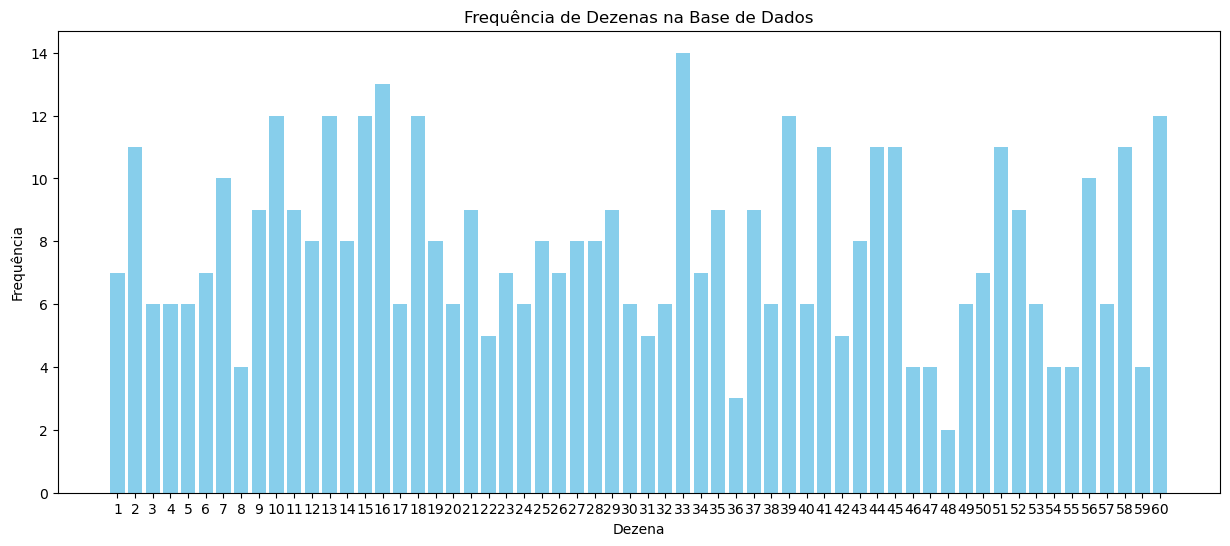

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

print("""
##############################################################################################
#################################### Contador de Dezenas #####################################
##############################################################################################
""")

# Função para ler um arquivo CSV e retornar um DataFrame do Pandas
def ler_csv(nome_arquivo):
    return pd.read_csv(nome_arquivo)

# Função para calcular a frequência de cada dezena na base de dados
def calcular_frequencia_dezenas(df):
    # Inicializa um dicionário para armazenar a frequência de cada dezena
    frequencia_dezenas = {str(num): 0 for num in range(1, 61)}

    # Itera sobre cada linha do DataFrame de apostas
    for _, row in df.iterrows():
        # Converte a linha em uma lista (aposta)
        aposta = row.tolist()

        # Atualiza a frequência de cada dezena na aposta
        for num in aposta:
            frequencia_dezenas[str(num)] += 1

    # Converte o dicionário em um DataFrame
    df_frequencia = pd.DataFrame(list(frequencia_dezenas.items()), columns=['Dezena', 'Frequencia'])

    # Converte a coluna 'Dezena' para o tipo int e ordena o DataFrame pela dezena em ordem crescente
    df_frequencia = df_frequencia.astype({'Dezena': int}).sort_values(by='Dezena').reset_index(drop=True)

    # Retorna o DataFrame de frequência de dezenas
    return df_frequencia

def exibir_dezenas_por_frequencia(df_frequencia):
    # Adiciona frequência zero para dezenas ausentes na base de dados
    dezenas_faltantes = list(set(range(1, 61)) - set(df_frequencia['Dezena']))
    df_frequencia = pd.concat([df_frequencia, pd.DataFrame({'Dezena': dezenas_faltantes, 'Frequencia': 0})],
                              ignore_index=True)

    # Ordena o DataFrame pela coluna 'Frequencia' em ordem decrescente
    df_frequencia = df_frequencia.sort_values(by='Frequencia', ascending=False).reset_index(drop=True)

    # Reorganiza as colunas para colocar 'Frequencia' na frente de 'Dezena'
    df_frequencia = df_frequencia[['Frequencia', 'Dezena']]

    # Exibe as dezenas ordenadas pela quantidade de frequências
    print("\nDezenas ordenadas pela quantidade de frequências:")
    print(tabulate(df_frequencia, headers='keys', tablefmt='fancy_grid', showindex=False))

    # Cria um gráfico de barras com espaçamento entre as barras
    plt.figure(figsize=(15, 6))
    plt.bar(df_frequencia['Dezena'], df_frequencia['Frequencia'], color='skyblue', width=0.8)  # Ajuste o valor da largura
    plt.title('Frequência de Dezenas na Base de Dados')
    plt.xlabel('Dezena')
    plt.ylabel('Frequência')
    plt.xticks(range(1, 61))  # Garante que todas as dezenas de 01 a 60 são exibidas
    plt.show()

# Substitua pelo caminho do seu arquivo CSV
arquivo_csv = "Base_de_apostas.csv"

# Lê o arquivo CSV de apostas e cria um DataFrame
df_apostas = ler_csv(arquivo_csv)

# Calcula a frequência de cada dezena na base de dados
df_frequencia = calcular_frequencia_dezenas(df_apostas)

# Exibe o DataFrame de frequência de dezenas em forma de tabela sem índice
print("\nDataFrame de Frequência de Dezenas:")
print(tabulate(df_frequencia, headers='keys', tablefmt='fancy_grid', showindex=False))

# Exibe as dezenas ordenadas pela quantidade de frequências e cria o gráfico
exibir_dezenas_por_frequencia(df_frequencia)
